In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [6]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
import seaborn as sns

In [10]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [11]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
147,Asus,Notebook,15.6,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18328.32,0
35,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,13266.72,0
1234,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08,51095.52,0
970,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7Y75 1.3GHz,16,512GB SSD,Intel HD Graphics 615,Windows 10,1.22,101178.72,1
1207,Lenovo,Notebook,15.6,1366x768,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.20,15930.72,0


In [12]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [13]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [14]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [15]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [16]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [17]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [18]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   ScreenResolution  1303 non-null   object 
 3   Cpu               1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float32
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  Ips               1303 non-null   int64  
 12  ppi               1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 122.3+ KB


In [20]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [21]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [22]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [23]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [24]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [25]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [26]:
df.sample(5)

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1007,HP,Ultrabook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 520,Windows 7,1.43,77202.72,0,0,157.350512,Intel Core i7,,256 SSD,,
1184,HP,Notebook,IPS Panel Full HD 1920x1080,6,1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,42570.72,0,1,141.211998,Intel Core i7,1000 HDD,,,
1137,Dell,Notebook,1366x768,8,1000 HDD,AMD Radeon R7 M445,Windows 10,2.50,41771.52,0,0,100.454670,Intel Core i5,1000 HDD,,,
765,Acer,Notebook,1366x768,4,128 SSD,Intel HD Graphics 520,Windows 10,1.60,34898.40,0,0,117.826530,Intel Core i5,,128 SSD,,
17,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 560,macOS,1.83,152274.24,0,1,220.534624,Intel Core i7,,512 SSD,,


In [27]:
df.drop(columns=['Memory'],inplace=True)
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128 SSD
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256 SSD
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512 SSD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256 SSD


In [28]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128 SSD,Intel
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,Intel
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256 SSD,Intel
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512 SSD,AMD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256 SSD,Intel


In [29]:
df = df[df['Gpu brand'] != 'ARM']

In [30]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [31]:
df['os'] = df['OpSys'].apply(cat_os)

In [32]:
df.drop(columns=['OpSys'],inplace=True)

In [33]:
df.sample(15)

,Company,TypeName,ScreenResolution,Ram,Gpu,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
197,HP,Notebook,Full HD 1920x1080,8,Intel UHD Graphics 620,1.490,51095.5200,0,0,165.632118,Intel Core i5,,512 SSD,Intel,Windows
341,Lenovo,Notebook,Full HD 1920x1080,12,AMD Radeon 530,2.200,47898.7200,0,0,141.211998,AMD Processor,2000 HDD,,AMD,Windows
260,Dell,Notebook,Full HD 1920x1080,8,AMD Radeon 530,2.800,60845.7600,0,0,127.335675,Intel Core i7,1000 HDD,128 SSD,AMD,Windows
1290,Dell,Notebook,1366x768,6,Intel HD Graphics 620,2.300,24455.5200,0,0,100.454670,Intel Core i3,1000 HDD,,Intel,Windows
464,Lenovo,Notebook,Full HD 1920x1080,8,Nvidia Quadro M2200M,2.670,111355.2000,0,0,141.211998,Intel Core i7,,256 SSD,Nvidia,Windows
173,Toshiba,Notebook,1366x768,4,Intel HD Graphics 620,2.000,26053.9200,0,0,100.454670,Intel Core i3,500 HDD,,Intel,Windows
1180,Lenovo,2 in 1 Convertible,IPS Panel Touchscreen 2560x1440,8,Intel HD Graphics 520,1.360,87219.3600,1,1,209.800683,Intel Core i5,,256 SSD,Intel,Windows
549,Lenovo,Notebook,IPS Panel Full HD 1920x1080,8,Intel HD Graphics 620,1.990,92121.1200,0,1,141.211998,Intel Core i7,,512 SSD,Intel,Windows
304,Asus,Gaming,Full HD 1920x1080,8,Nvidia GeForce GTX 1050 Ti,2.500,67399.2000,0,0,141.211998,Intel Core i7,1000 HDD,128 SSD,Nvidia,Windows
1213,Dell,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,8,Intel HD Graphics 620,2.191,53226.7200,1,1,141.211998,Intel Core i5,,256 SSD,Intel,Windows


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   ScreenResolution  1302 non-null   object 
 3   Ram               1302 non-null   int32  
 4   Gpu               1302 non-null   object 
 5   Weight            1302 non-null   float32
 6   Price             1302 non-null   float64
 7   Touchscreen       1302 non-null   int64  
 8   Ips               1302 non-null   int64  
 9   ppi               1302 non-null   float64
 10  Cpu brand         1302 non-null   object 
 11  HDD               1302 non-null   object 
 12  SSD               1302 non-null   object 
 13  Gpu brand         1302 non-null   object 
 14  os                1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 152.6+ KB


In [35]:
df["HDD"] = df["HDD"].str.replace('HDD', '')

In [36]:
df.sample(15)

,Company,TypeName,ScreenResolution,Ram,Gpu,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128 SSD,Intel,Mac
788,Acer,Gaming,IPS Panel Full HD 1920x1080,16,Nvidia GeForce GTX 1060,4.20,122490.7200,0,1,127.335675,Intel Core i7,1000,256 SSD,Nvidia,Windows
904,Lenovo,Notebook,IPS Panel Full HD 1920x1080,8,Intel HD Graphics 620,1.95,104588.1072,0,1,141.211998,Intel Core i5,,512 SSD,Intel,Windows
696,Lenovo,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,16,Intel HD Graphics 620,1.38,93186.7200,1,0,157.350512,Intel Core i7,,512 SSD,Intel,Windows
494,Asus,Gaming,IPS Panel Full HD / Touchscreen 1920x1080,24,Nvidia GeForce GTX 965M,4.33,67612.3200,1,1,127.335675,Intel Core i7,1000,256 SSD,Nvidia,Windows
286,Lenovo,Notebook,IPS Panel Full HD 1920x1080,8,Intel HD Graphics 630,1.95,58448.1600,0,1,141.211998,Intel Core i7,,256 SSD,Intel,Windows
668,Toshiba,Notebook,IPS Panel Full HD 1920x1080,8,Intel HD Graphics 620,2.00,67026.2400,0,1,141.211998,Intel Core i5,,256 SSD,Intel,Windows
622,Dell,Notebook,Full HD 1920x1080,4,AMD Radeon 530,2.20,41345.2800,0,0,141.211998,Intel Core i5,1000,,AMD,Windows
567,Fujitsu,Notebook,1366x768,8,Intel HD Graphics 620,2.20,39373.9200,0,0,100.454670,Intel Core i5,1000,,Intel,Windows
1126,Lenovo,2 in 1 Convertible,IPS Panel Touchscreen 1920x1200,4,Intel HD Graphics 400,0.69,25521.1200,1,1,224.173809,Other Intel Processor,,,Intel,Windows


In [37]:
df["SSD"] = df["SSD"].str.replace('SSD', '')

In [38]:
df.sample(15)

,Company,TypeName,ScreenResolution,Ram,Gpu,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
535,Dell,Notebook,Full HD 1920x1080,8,Nvidia GeForce 930MX,1.93,72940.3200,0,0,141.211998,Intel Core i7,,256,Nvidia,Windows
1039,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,1.64,53839.9728,0,0,157.350512,Intel Core i5,,256,Intel,Windows
1119,Asus,Gaming,Full HD 1920x1080,8,Nvidia GeForce GTX 960M,3.52,69929.4672,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Windows
1011,HP,Ultrabook,Full HD 1920x1080,4,Intel HD Graphics 620,1.26,81997.9200,0,0,176.232574,Intel Core i5,500,,Intel,Windows
113,HP,Notebook,IPS Panel 1366x768,4,Intel UHD Graphics 620,1.63,38468.1600,0,1,111.935204,Intel Core i5,500,,Intel,Windows
894,MSI,Gaming,IPS Panel 4K Ultra HD 3840x2160,16,Nvidia GeForce GTX 1060,2.43,141138.7200,0,1,254.671349,Intel Core i7,2000,512,Nvidia,Windows
708,Lenovo,Notebook,Full HD 1920x1080,8,Intel HD Graphics 520,1.80,63456.4800,0,0,157.350512,Intel Core i5,,256,Intel,Windows
75,Asus,Gaming,Full HD 1920x1080,8,Nvidia GeForce GTX 1050,2.20,50562.7200,0,0,141.211998,Intel Core i7,1000,,Nvidia,Windows
649,Lenovo,Ultrabook,IPS Panel Full HD 1920x1080,8,Intel HD Graphics 620,1.36,84395.5200,0,1,176.232574,Intel Core i7,,256,Intel,Windows
69,Asus,Gaming,Full HD 1920x1080,12,Nvidia GeForce GTX 1050 Ti,3.00,50562.7200,0,0,127.335675,Intel Core i7,1000,,Nvidia,Others/No OS/Linux


In [39]:
df['HDD'] = df['HDD'].replace('', np.nan)  # Replace empty strings with NaN
df['HDD'] = df['HDD'].replace('[^\d]', '', regex=True)  # Remove non-numeric characters
df['HDD'] = df['HDD'].fillna(0).astype(int)  # Fill NaN values with 0 and convert to int

In [40]:
df['SSD'] = df['SSD'].replace('', np.nan)  # Replace empty strings with NaN
df['SSD'] = df['SSD'].replace('[^\d]', '', regex=True)  # Remove non-numeric characters
df['SSD'] = df['SSD'].fillna(0).astype(int)  # Fill NaN values with 0 and convert to int

In [41]:
df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Gpu'],inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Company'] = label.fit_transform(df['Company'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - Acer
1 - Apple
2 - Asus
3 - Chuwi
4 - Dell
5 - Fujitsu
6 - Google
7 - HP
8 - Huawei
9 - LG
10 - Lenovo
11 - MSI
12 - Mediacom
13 - Microsoft
14 - Razer
15 - Samsung
16 - Toshiba
17 - Vero
18 - Xiaomi


In [43]:
df['TypeName'] = label.fit_transform(df['TypeName'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - 2 in 1 Convertible
1 - Gaming
2 - Netbook
3 - Notebook
4 - Ultrabook
5 - Workstation


In [44]:
df['Cpu brand'] = label.fit_transform(df['Cpu brand'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - AMD Processor
1 - Intel Core i3
2 - Intel Core i5
3 - Intel Core i7
4 - Other Intel Processor


In [45]:
df['Gpu brand'] = label.fit_transform(df['Gpu brand'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - AMD
1 - Intel
2 - Nvidia


In [46]:
df['os'] = label.fit_transform(df['os'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - Mac
1 - Others/No OS/Linux
2 - Windows


In [47]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,1,4,8,1.37,71378.6832,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,47895.5232,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,30636.0000,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,135195.3360,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,96095.8080,0,1,226.983005,2,0,256,1,0


C:\Users\zahee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


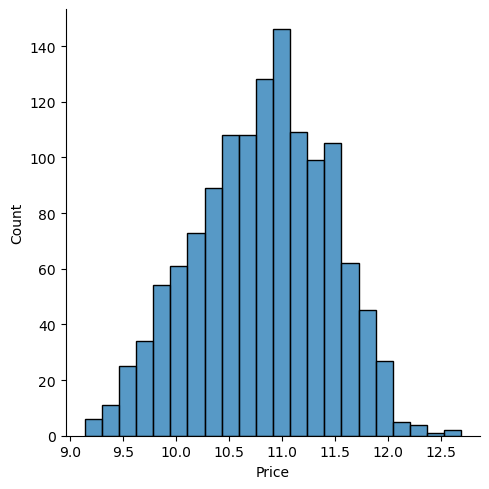

In [48]:
sns.displot(np.log(df['Price']))

In [49]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [51]:
x = df.drop(columns=['Price','ppi'])
y = df['Price']

In [52]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.601946488022105
MAE: 15384.786966848225


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   int32  
 1   TypeName     1302 non-null   int32  
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   int32  
 9   HDD          1302 non-null   int32  
 10  SSD          1302 non-null   int32  
 11  Gpu brand    1302 non-null   int32  
 12  os           1302 non-null   int32  
dtypes: float32(1), float64(2), int32(8), int64(2)
memory usage: 96.6 KB


In [54]:
Company = int(input('Enter no of com:'))
TypeName = int(input('Enter no of type:'))
Ram  = int(input('Enter ra:'))
Weight = int(input('Enter wei:'))
Touchscreen = int(input('ts'))
Ips = int(input('Enter ips:'))
Cpubrand = int(input('Enter Type:'))
HDD   = int(input('Enter hdd:'))
SSD = int(input('Enter ssd:'))
Gpubrand = int(input('Enter gpu:'))
os = int(input('Enter os:'))

Enter no of com:0
Enter no of type:3
Enter ra:8
Enter wei:2
ts0
Enter ips:0
Enter Type:2
Enter hdd:0
Enter ssd:256
Enter gpu:1
Enter os:2


In [55]:
import numpy as np
input_data = np.array([[Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpubrand,HDD,SSD,Gpubrand,os]])
result = model.predict(input_data)[0]
print(f'Laptop Price Predicted is {result} rupees')

Laptop Price Predicted is 49835.20329910252 rupees


C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
import pickle

In [57]:
with open("laptop.pkl",'wb') as f:
    pickle.dump(model,f)

In [58]:
predicted_model = pickle.load(open('laptop.pkl','rb'))

In [59]:
predicted_model.predict(input_data)

C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49835.2032991])

In [60]:
!pip install streamlit